In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/4th_SEM/CSE4020_PROJECT_Machine_Learning/train.csv" train.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
221668,221668,329070,237417,Who is girl Priyanka in MS Dhoni 'The Untold S...,What are the best scene that you like in movie...,0
200893,200893,302782,302783,I'm an experienced programmer considering quit...,Which are the best companies to work with in G...,0
59600,59600,104357,104358,How many countries' people are on Quora right ...,How many people are on Quora right now?,0
251062,251062,365087,365088,"According to Vedic astrology, what type of pro...",What are some ways to prove you love someone?,0
303231,303231,65149,426340,What is the beauty standard for men and women ...,Why do foreign men likes less attractive Asian...,0
239300,239300,103347,9747,Can I start a sentence with ‘so’?,"Can you start a sentence with ""it""?",0
295802,295802,95817,417902,What are the hardest Hindi films to charade wh...,Which Hindi film had the best bloopers?,0
362001,362001,169245,20868,What we want to do to avoid pimples?,How can I get rid of my acne?,0
263431,263431,379977,100038,How accurate are Nostradamus's predictions?,How did Nostradamus make so many accurate pred...,0
96766,96766,161133,57938,Where do swear words originate from?,Where did cuss words come from?,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


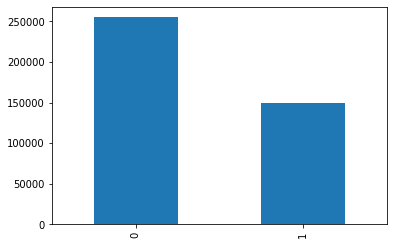

In [ ]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


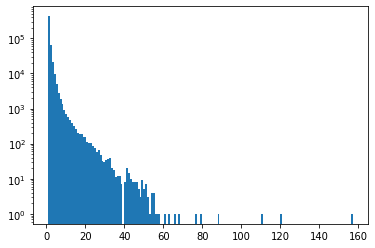

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()